# Machine Intelligence 2 
## Exercise Sheet 4: Density Transformations & random number generation
### Coding Solutions

In [185]:
# import libraries that we are going to need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.rcParams.update({
    "text.usetex": True,  # Enable LaTeX rendering
    "font.family": "serif",  # Use serif fonts
    "font.serif": ["Computer Modern Roman"],  # Match LaTeX default
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})  # just some global font settings for matplotlib (not necessary)
from scipy.stats import gaussian_kde  # to estimate density in b)

### Exercise H4.1: The Inverse CDF method 

(b) Implement your procedure for verification and generate 500 samples for a Laplacian random
variable $X$ with a specific mean $\mu = 1$ and scale parameter $b = 2$.

In [186]:
# we define a function that generates samples from a laplacian distribution using the inverse CDF method
def laplacian_sampling(z, mu=1, b=2):
    """
    Generate samples from a Laplacian distribution using the inverse CDF method.
    
    Parameters
    ----------
    z : array-like
        Samples from a uniform distribution in the range [0, 1].
    mu : float, optional
        Mean of the Laplacian distribution. Default is 1.
    b : float, optional
        Scale parameter of the Laplacian distribution. Default is 2.
        
    Returns
    -------
    array-like
        Samples from the Laplacian distribution.
            
    """

    return np.sign(z - 0.5) * b * np.log(2 * np.abs(z - 0.5)) + mu

Plot a density estimate (e.g. normalized histogram) for these samples overlayed with the pdf
pX(x) from above.

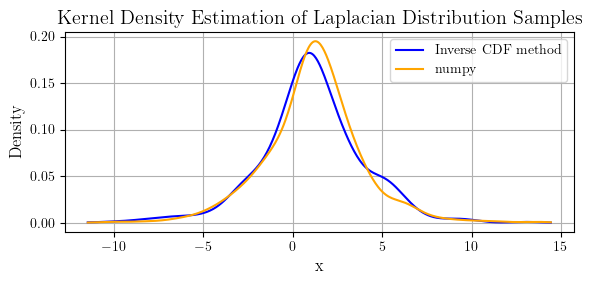

In [187]:
# generate 500 samples from a uniform distribution
n_samples = 500
u = np.random.uniform(0, 1, n_samples)
# generate samples from the laplacian distribution using our function
samples = laplacian_sampling(u)
# generate 500 samples from a laplacian distrbution using numpy
samples_numpy = np.random.laplace(1, 2, n_samples)

# plot the the Kernel Density Estimator of the densities based on the two sets of samples

# create KDE object for both sets of samples
kde = gaussian_kde(samples)
kde_numpy = gaussian_kde(samples_numpy)
# create a grid of points to evaluate the KDE
x = np.linspace(np.min(samples + samples_numpy), np.max(samples + samples_numpy), 500)

# plot the KDE for both sets of samples
plt.figure(figsize=(6, 3))
plt.plot(x, kde(x), label='Inverse CDF method', color='blue')
plt.plot(x, kde_numpy(x), label='numpy', color='orange')
plt.title('Kernel Density Estimation of Laplacian Distribution Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
